In [1]:
import ROOT
import glob
import math
import pandas as pd, numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Welcome to JupyROOT 6.26/04


In [2]:
path = "/home/berki/Software/TPCQCVis/data/userFiles/"
f = ROOT.TFile.Open(path+"clusterInvestigation.root","READ")
clus = f.Get("Clusters;1")

In [3]:
# Extract info from all the MOs
df = pd.DataFrame()

for name in ["Q_Max","Q_Tot","Sigma_Time","Sigma_Pad","Time_Bin","N_Clusters"]:
    means_a=[]
    stdDevs_a=[]
    means_c=[]
    stdDevs_c=[]
    entries=[]
    for i in range(2018):
        c = clus.Get("c_Sides_"+name+";"+str(i+1))
        hist_a = c.GetPrimitive("c_Sides_"+name+"_3").GetPrimitive("h_Aside_1D_"+name)
        hist_a.GetXaxis().SetRange(2,hist_a.GetNbinsX())
        entries.append(hist_a.GetEntries())
        means_a.append(hist_a.GetMean())
        stdDevs_a.append(hist_a.GetStdDev())
        hist_c = c.GetPrimitive("c_Sides_"+name+"_4").GetPrimitive("h_Cside_1D_"+name)
        hist_c.GetXaxis().SetRange(2,hist_c.GetNbinsX())
        means_c.append(hist_c.GetMean())
        stdDevs_c.append(hist_c.GetStdDev())
    #print(means)
    df[name+'_entries'] = entries
    df[name+'_A'] = means_a
    df[name+'_C'] = means_c
    df[name] = (df[name+'_A']+df[name+'_C'])/2
    df[name+'_A_stdDev'] = stdDevs_a
    df[name+'_C_stdDev'] = stdDevs_c

In [39]:
# Add runNumber metaData to values
df["runNumber"] = list(selected_files[selected_files["Name"]=="c_Sides_Q_Max"].RunNumber)

In [46]:
# Aggregate the df to have one entry per runNumber
#aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
#df_new = df.groupby(df['id']).aggregate(aggregation_functions)
df_new = df.groupby(df['runNumber']).last()
df_new

,Q_Max_entries,Q_Max_A,Q_Max_C,Q_Max,Q_Max_A_stdDev,Q_Max_C_stdDev,Q_Tot_entries,Q_Tot_A,Q_Tot_C,Q_Tot,...,Time_Bin_C,Time_Bin,Time_Bin_A_stdDev,Time_Bin_C_stdDev,N_Clusters_entries,N_Clusters_A,N_Clusters_C,N_Clusters,N_Clusters_A_stdDev,N_Clusters_C_stdDev
runNumber,,,,,,,,,,,,,,,,,,,,,
512103,262080.0,46.464127,45.350124,45.907125,51.788206,51.462770,262080.0,289.057503,288.917463,288.987483,...,28401.295817,28447.472383,10833.160942,10844.852380,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000
512172,262080.0,38.272940,37.968810,38.120875,50.272772,50.216633,262080.0,290.724821,290.447210,290.586016,...,28483.652337,28418.954827,11305.010923,11337.319500,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000
512207,262080.0,42.159217,40.978398,41.568807,51.278751,50.819667,262080.0,290.392056,290.368368,290.380212,...,28824.365581,28809.770088,13738.658605,13914.420362,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000
512287,262080.0,40.719356,40.029995,40.374675,50.814073,50.467156,262080.0,291.425399,290.478662,290.952030,...,28591.751423,28581.743092,10006.667495,10012.576879,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000
512497,262080.0,34.241312,33.823253,34.032282,48.750678,48.470245,262080.0,291.191106,290.533010,290.862058,...,28741.333970,28705.396191,10147.573843,10011.730710,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522433,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000,262080.0,288.542309,287.220568,287.881438,...,27524.199076,27285.259887,9646.731661,10130.781514,262080.0,12.205789,12.209318,12.207553,17.069784,16.878868
522434,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000,262080.0,288.634321,285.706965,287.170643,...,29595.063721,29598.341063,1127.008621,1147.807829,262080.0,11.508363,11.529176,11.518770,16.450866,16.250824
522435,262080.0,0.000000,0.000000,0.000000,0.000000,0.000000,262080.0,286.874665,286.345237,286.609951,...,29595.063339,29598.341063,1127.009095,1147.809290,262080.0,11.224886,11.131145,11.178015,16.169038,15.857541


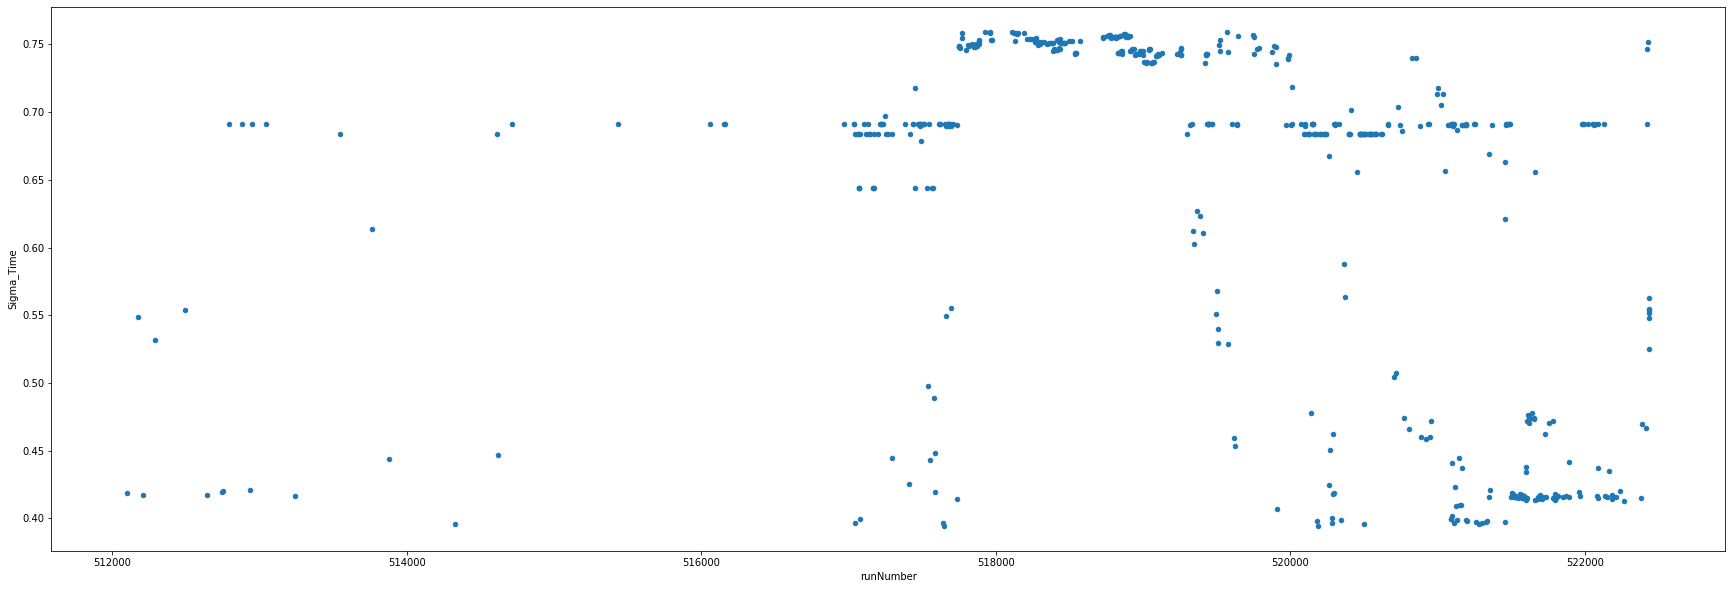

In [54]:
plt.rcParams["figure.figsize"] = (30,10)
ax = plt.gca()
df_new[df_new["Sigma_Time"]>0].reset_index().plot(x='runNumber',y='Sigma_Time',kind='scatter',ax=ax)

plt.show()

In [34]:
selected_files

,ID,Path,Name,TimeStamp,Type,Task,Size,RunNumber
3085,3086,qc/TPC/MO/Clusters/,c_Sides_Q_Max,1648777170529,TCanvas,Clusters,346112,512207
3088,3089,qc/TPC/MO/Clusters/,c_Sides_Q_Max,1648780773905,TCanvas,Clusters,351232,512207
3093,3094,qc/TPC/MO/Clusters/,c_Sides_Q_Max,1648784377213,TCanvas,Clusters,335872,512207
3097,3098,qc/TPC/MO/Clusters/,c_Sides_Q_Max,1648787980593,TCanvas,Clusters,345088,512207
3101,3102,qc/TPC/MO/Clusters/,c_Sides_Q_Max,1648791583946,TCanvas,Clusters,331776,512207
...,...,...,...,...,...,...,...,...
92624,92625,qc/TPC/MO/Clusters/,c_Sides_Sigma_Pad,1659425446158,TCanvas,Clusters,427008,522430
92627,92628,qc/TPC/MO/Clusters/,c_Sides_Sigma_Pad,1659425505931,TCanvas,Clusters,427008,522430
92630,92631,qc/TPC/MO/Clusters/,c_Sides_Sigma_Pad,1659425566220,TCanvas,Clusters,427008,522430
92632,92633,qc/TPC/MO/Clusters/,c_Sides_Sigma_Pad,1659425626274,TCanvas,Clusters,424960,522430


In [42]:
len(set(list(selected_files[selected_files["Name"]=="c_Sides_Q_Max"].RunNumber)))

616